<a href="https://colab.research.google.com/github/bhaveshgandhi1/greatlearningpgaiml/blob/master/Computer_Vision_with_CNNs_R8_CVwithCNN_Project2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- You can check “Meta” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in validation

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data_dir = '/content/drive/My Drive/CNN/Data_German_Traffic_Sign_Recognition'

In [ ]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['Train', 'Meta']

In [ ]:
train_path = my_data_dir+'/Train'

In [ ]:
l_classes = os.listdir(train_path)

In [ ]:
os.listdir(train_path+'/30')[0]

'00030_00012_00002.png'

In [ ]:
para_cell = train_path+'/30'+'/00030_00012_00002.png'

In [ ]:
para_img= imread(para_cell)

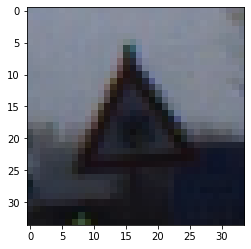

In [ ]:
plt.imshow(para_img)

In [ ]:
para_img.shape

(34, 34, 3)

In [ ]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
#for i in l_classes:
for image_filename in os.listdir(train_path+'/'+'30'):
  img = imread(train_path+'/'+'30'+'/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)




    
    
    
    
    

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


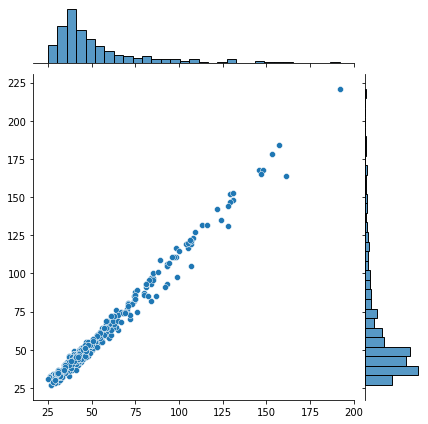

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
np.mean(dim1)

51.64

In [ ]:
np.mean(dim2)

56.24

In [ ]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
#for i in l_classes:
for image_filename in os.listdir(train_path+'/'+'25'):
  img = imread(train_path+'/'+'25'+'/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [ ]:
np.mean(dim1)

60.83533333333333

In [ ]:
np.mean(dim2)

64.822

In [ ]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for i in l_classes:
  for image_filename in os.listdir(train_path+'/'+i):
    img = imread(train_path+'/'+i+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
np.mean(dim1)

51.859603906673904

In [ ]:
np.mean(dim2)

52.68692349430277

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


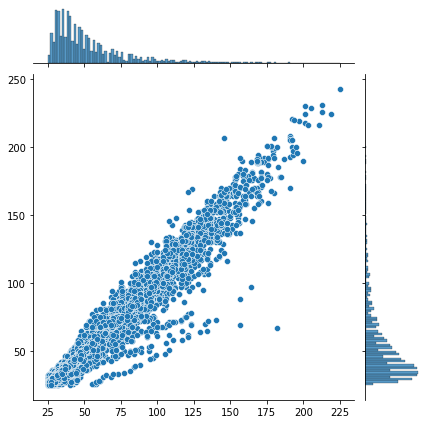

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
img_size=71

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
batch_size = 32
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
      rescale=1./255.,
      #vertical_flip=True, 
      horizontal_flip=True,
      rotation_range=0.4, 
      zoom_range=0.25,
      shear_range=0.1,
      fill_mode='nearest',
      validation_split=0.25
)


In [ ]:
print(train_datagen)

In [ ]:
#val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/CNN/Data_German_Traffic_Sign_Recognition/Train',
        subset='training',
        target_size=(img_size, img_size),
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')


Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/CNN/Data_German_Traffic_Sign_Recognition/Train',
        subset='validation',
        target_size=(img_size, img_size),
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')

Found 7364 images belonging to 33 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()



model.add(Conv2D(filters=128, kernel_size=3,activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

# Second Convolutional Layer
#model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = len(set(train_generator.classes)), activation = 'softmax'))



### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### Get model summary (2 Marks)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 53, 53, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [ ]:
# checkpoint
filepath="weights.trafficsign.transfer.preprocess.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
batch_size = 32

fitted_model = model.fit(
        train_generator,
        #steps_per_epoch= int(train_generator.samples) // batch_size,
        epochs=100,
        validation_data=validation_generator,
        #validation_steps= int(validation_generator.samples) // batch_size,
        callbacks=[checkpoint]
        )

Epoch 1/100
173/173 [==============================] - 6101s 35s/step - loss: 3.3132 - accuracy: 0.1369 - val_loss: 2.6590 - val_accuracy: 0.2380

Epoch 00001: val_accuracy improved from -inf to 0.23805, saving model to weights.trafficsign.transfer.preprocess.best.hdf5
Epoch 2/100
173/173 [==============================] - 77s 447ms/step - loss: 1.6835 - accuracy: 0.4431 - val_loss: 1.6290 - val_accuracy: 0.5065

Epoch 00002: val_accuracy improved from 0.23805 to 0.50652, saving model to weights.trafficsign.transfer.preprocess.best.hdf5
Epoch 3/100
173/173 [==============================] - 77s 444ms/step - loss: 1.3653 - accuracy: 0.5297 - val_loss: 1.3938 - val_accuracy: 0.5600

Epoch 00003: val_accuracy improved from 0.50652 to 0.56002, saving model to weights.trafficsign.transfer.preprocess.best.hdf5
Epoch 4/100
173/173 [==============================] - 77s 447ms/step - loss: 1.1518 - accuracy: 0.6079 - val_loss: 0.9822 - val_accuracy: 0.7051

Epoch 00004: val_accuracy improved fr

### Draw plots (3 Marks)


- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

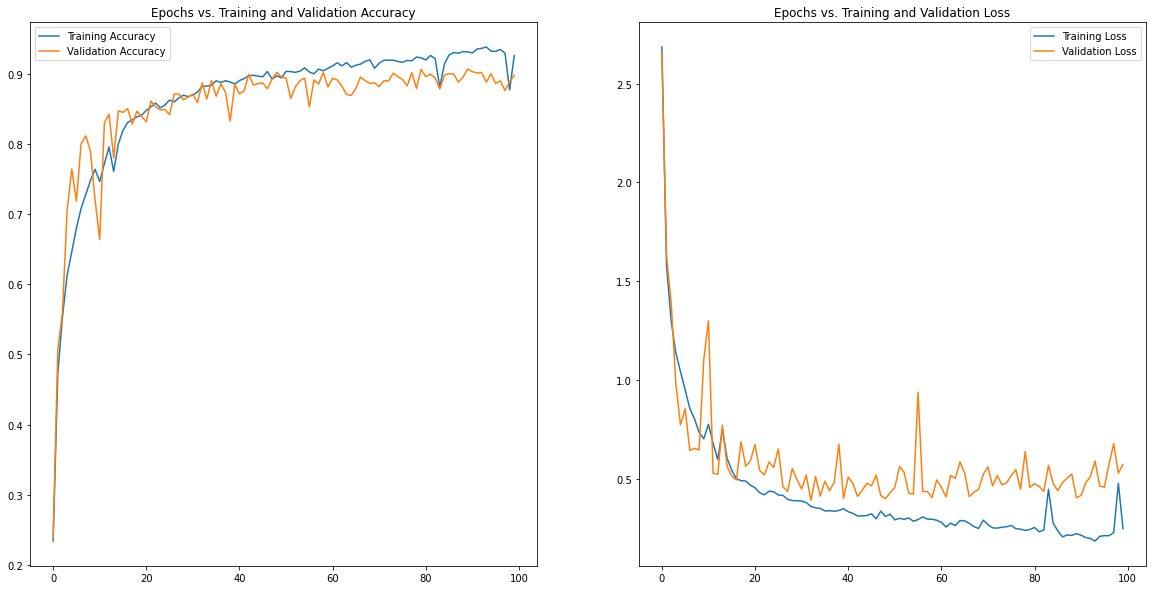

In [ ]:
# Evaluate train and validation accuracies and losses

train_acc = fitted_model.history['accuracy']
val_acc = fitted_model.history['val_accuracy']

train_loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']



plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [ ]:
from keras.applications import ResNet50,Xception
tf.keras.backend.clear_session()

In [ ]:
conv_base = Xception(weights='imagenet',include_top=False,input_shape=(71,71,3))

In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
conv_base.trainable = True

In [ ]:
set_trainable=False

In [ ]:
for layer in conv_base.layers:
  if layer.name=='block14_sepconv1':
    set_trainable=True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False





In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Resizing,Rescaling

In [ ]:
model = Sequential()
# First Convolutional Layer
#model.add(tf.keras.layers.BatchNormalization())
model.add(Resizing(img_size, img_size))
#model.add(Rescaling(1./255))

model.add(conv_base)

model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(units = len(set(train_generator.classes)), activation = 'softmax'))

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
for layer in conv_base.layers:
  if layer.trainable:
    print(layer.name)


block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act


In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [ ]:
# checkpoint
filepath="weights.trafficsign_xception.transfer3.preprocess.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
batch_size = 64

fitted_model = model.fit(
        train_generator,
        #steps_per_epoch= int(train_generator.samples) // batch_size,
        epochs=100,
        validation_data=validation_generator,
        #validation_steps= int(validation_generator.samples) // batch_size,
        callbacks=[checkpoint]
        )

Epoch 1/100
692/692 [==============================] - 166s 235ms/step - loss: 1.6489 - accuracy: 0.5276 - val_loss: 1.4800 - val_accuracy: 0.6103

Epoch 00001: val_accuracy improved from -inf to 0.61027, saving model to weights.trafficsign_xception.transfer3.preprocess.best.hdf5
Epoch 2/100
692/692 [==============================] - 164s 237ms/step - loss: 0.6931 - accuracy: 0.7820 - val_loss: 1.3813 - val_accuracy: 0.6233

Epoch 00002: val_accuracy improved from 0.61027 to 0.62330, saving model to weights.trafficsign_xception.transfer3.preprocess.best.hdf5
Epoch 3/100
692/692 [==============================] - 165s 239ms/step - loss: 0.4926 - accuracy: 0.8437 - val_loss: 1.5958 - val_accuracy: 0.6457

Epoch 00003: val_accuracy improved from 0.62330 to 0.64571, saving model to weights.trafficsign_xception.transfer3.preprocess.best.hdf5
Epoch 4/100
692/692 [==============================] - 171s 247ms/step - loss: 0.3852 - accuracy: 0.8774 - val_loss: 1.3816 - val_accuracy: 0.6521

Epo